# Angel Barral Diaz
## We will introuce few modules

In [1]:
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Now we will add few usefull constants and we will define the functions of energy lost and Wmax

In [2]:
# Fine coupling constant
aem = 1/137.035999139

# Unit conversion factor 
hc = 197.3269788  # MeV * fm 

# Medium properties (water)
I = 0.0000797      # Mean excitation energy [MeV]
Z2A = 0.55509      # mol/g
rho = 1.0          # g/cm^3

# Combination of constants
K = 0.307075     # MeV*cm^2/mol

# Projectile mass
Mp = 938.272081    # proton

# Target mass
me = 0.51099895    # electron


In [3]:
def Wmax(p,M,m=me):

    betagamma = p/M
    gamma = np.sqrt(1+betagamma*betagamma)
    
    val = 2*m*betagamma*betagamma
    corr = 1 + 2*gamma*(m/M) + (m/M)*(m/M)
    
    return val/corr

#We define the ionization energy loss formula

def dEdx(p,M,z=1):
    betagamma = p/M
    beta = betagamma/np.sqrt(1+betagamma*betagamma)
    val = K*rho*Z2A*z*z/beta/beta*(0.5*np.log(2*me*betagamma*betagamma*Wmax(p,Mp,me)/I/I)-beta*beta)
    return val

# This function will plot the energy losses of  a particle till its energy decreases to some limit set on 9MeV

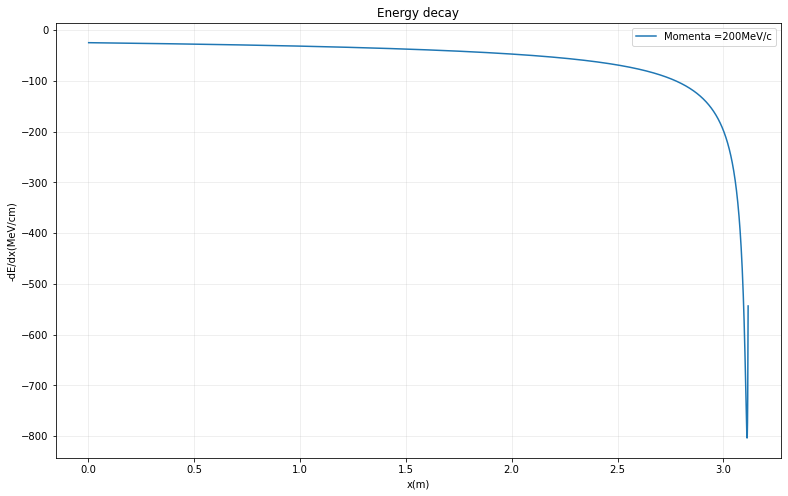

In [4]:
#We will use numerical integration to plot the enrgy loses dE/dx on the media

#We define the function that plots the energy decay curve following the before formula and gives us the range
def energy_losses(momenta):
    #We define som aux parameters
 
    fig,ax=plt.subplots(1,1,figsize=(13,8))
    
    #We run over all momenta
    x=[0]
    E=momenta
    dx=0.001
    dEdX=[]
        
    title="Momenta ="+str(E)+"MeV/c"
        
    #We will repeat the integration till our energy goes under some umbral (1MeV)
    while True:  
        E=E-np.abs(dx*dEdx(E,Mp,z=1))
        x.append(x[-1]+dx)
        dEdX.append(-dEdx(E,Mp,z=1))
        
        if E<10.:
            #Once we arrive to the limit, we plot the vectors and break the while loop
            ax.plot(x[1:],dEdX, label=title, )
            break
    ax.set_ylabel("-dE/dx(MeV/cm)")
    ax.set_xlabel("x(m)")
    ax.set_title("Energy decay")
    ax.grid("-.", alpha=0.25)
    ax.legend(loc="best")
    
energy_losses(200)

# Now we will make a function that takes a vector of momenta and follows them till they drop to a limit value (1MeV), and returns the plot and maximum range

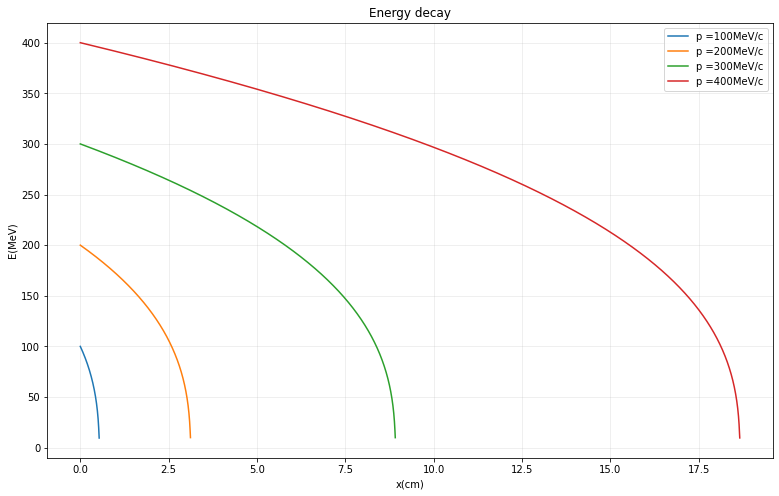

In [5]:
#We define the function that plots the energy decay curve following the before formula and gives us the range
def energy_range(momenta):
    #We define som aux parameters
    
    xrange=[]
    fig,ax=plt.subplots(1,1,figsize=(13,8))
    
    #We run over all momenta
    for p in momenta:
        x=[0]
        E=[p]
        dx=0.001
        
        title="p ="+str(p)+"MeV/c"
        
        #We will repeat the integration till our energy goes under some umbral (1MeV)
        while True:  
            E.append(E[-1]-np.abs(dx*dEdx(E[-1],Mp,z=1)))
            x.append(x[-1]+dx)
            
            if E[-1]<10.:
                #Once we arrive to the limit, we plot the vectors and break the while loop
                ax.plot(x,E, label=title)
                xrange.append(x[-1])
                break
    ax.set_ylabel("E(MeV)")
    ax.set_xlabel("x(cm)")
    ax.set_title("Energy decay")
    ax.grid("-.", alpha=0.25)
    ax.legend(loc="best")
    
    
    return xrange

#Now we will run it for the specified range of energies and we will get the ranges of the particles

p=[100,200,300,400]
ranges=energy_range(p)

# Now we get the last value of the position, and plot it to see the variation of the maximum range between the different momenta

Text(0.5, 1.0, 'Range of protons')

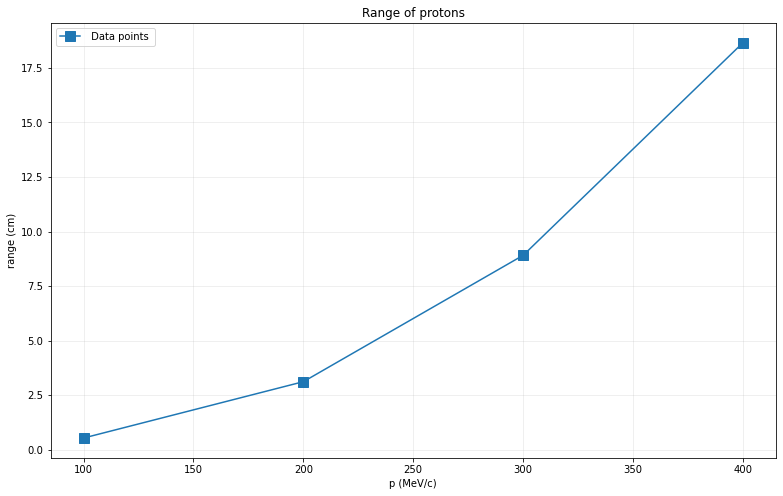

In [6]:
#Now we will plot the ranges of the protons compared with its energy

fig, ax = plt.subplots(1,1, figsize=(13,8))

ax.plot(p,ranges,ms=10,marker="s",label=' Data points ')
ax.legend(loc='best')
ax.set_xlabel("p (MeV/c)")
ax.set_ylabel("range (cm)")
ax.grid("-.", alpha=0.25)
ax.set_title("Range of protons")

## Protons are accelerated to therapeutic energies, typically from 70 to 250 MeV, so this energies are shown on our plots, and as we can see that the ranges of this protons are on the order of a few centimeters penetration